In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_DataSet.csv')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
# Remove duplicates
df = df.drop_duplicates()
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [6]:
goal = df['Churn']
counts = goal.value_counts()
percent = goal.value_counts(normalize=True)
counts

Churn
No     5153
Yes    1857
Name: count, dtype: int64

In [36]:
numericFeatures = list(df.select_dtypes(include='number').columns)
categoricalFeatures = list(set(df.columns) - set(numericFeatures))

# Remove goal attribute
categoricalFeatures.remove('Churn')

goalAttribute = 'Churn'

print(f'Numeric features: {len(numericFeatures)}, {numericFeatures}\n Categorical Features: {len(categoricalFeatures)}, {categoricalFeatures}')

Numeric features: 3, ['tenure', 'MonthlyCharges', 'TotalCharges']
 Categorical Features: 16, ['StreamingTV', 'Dependents', 'Partner', 'PhoneService', 'InternetService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'gender', 'PaymentMethod', 'SeniorCitizen', 'Contract', 'StreamingMovies']


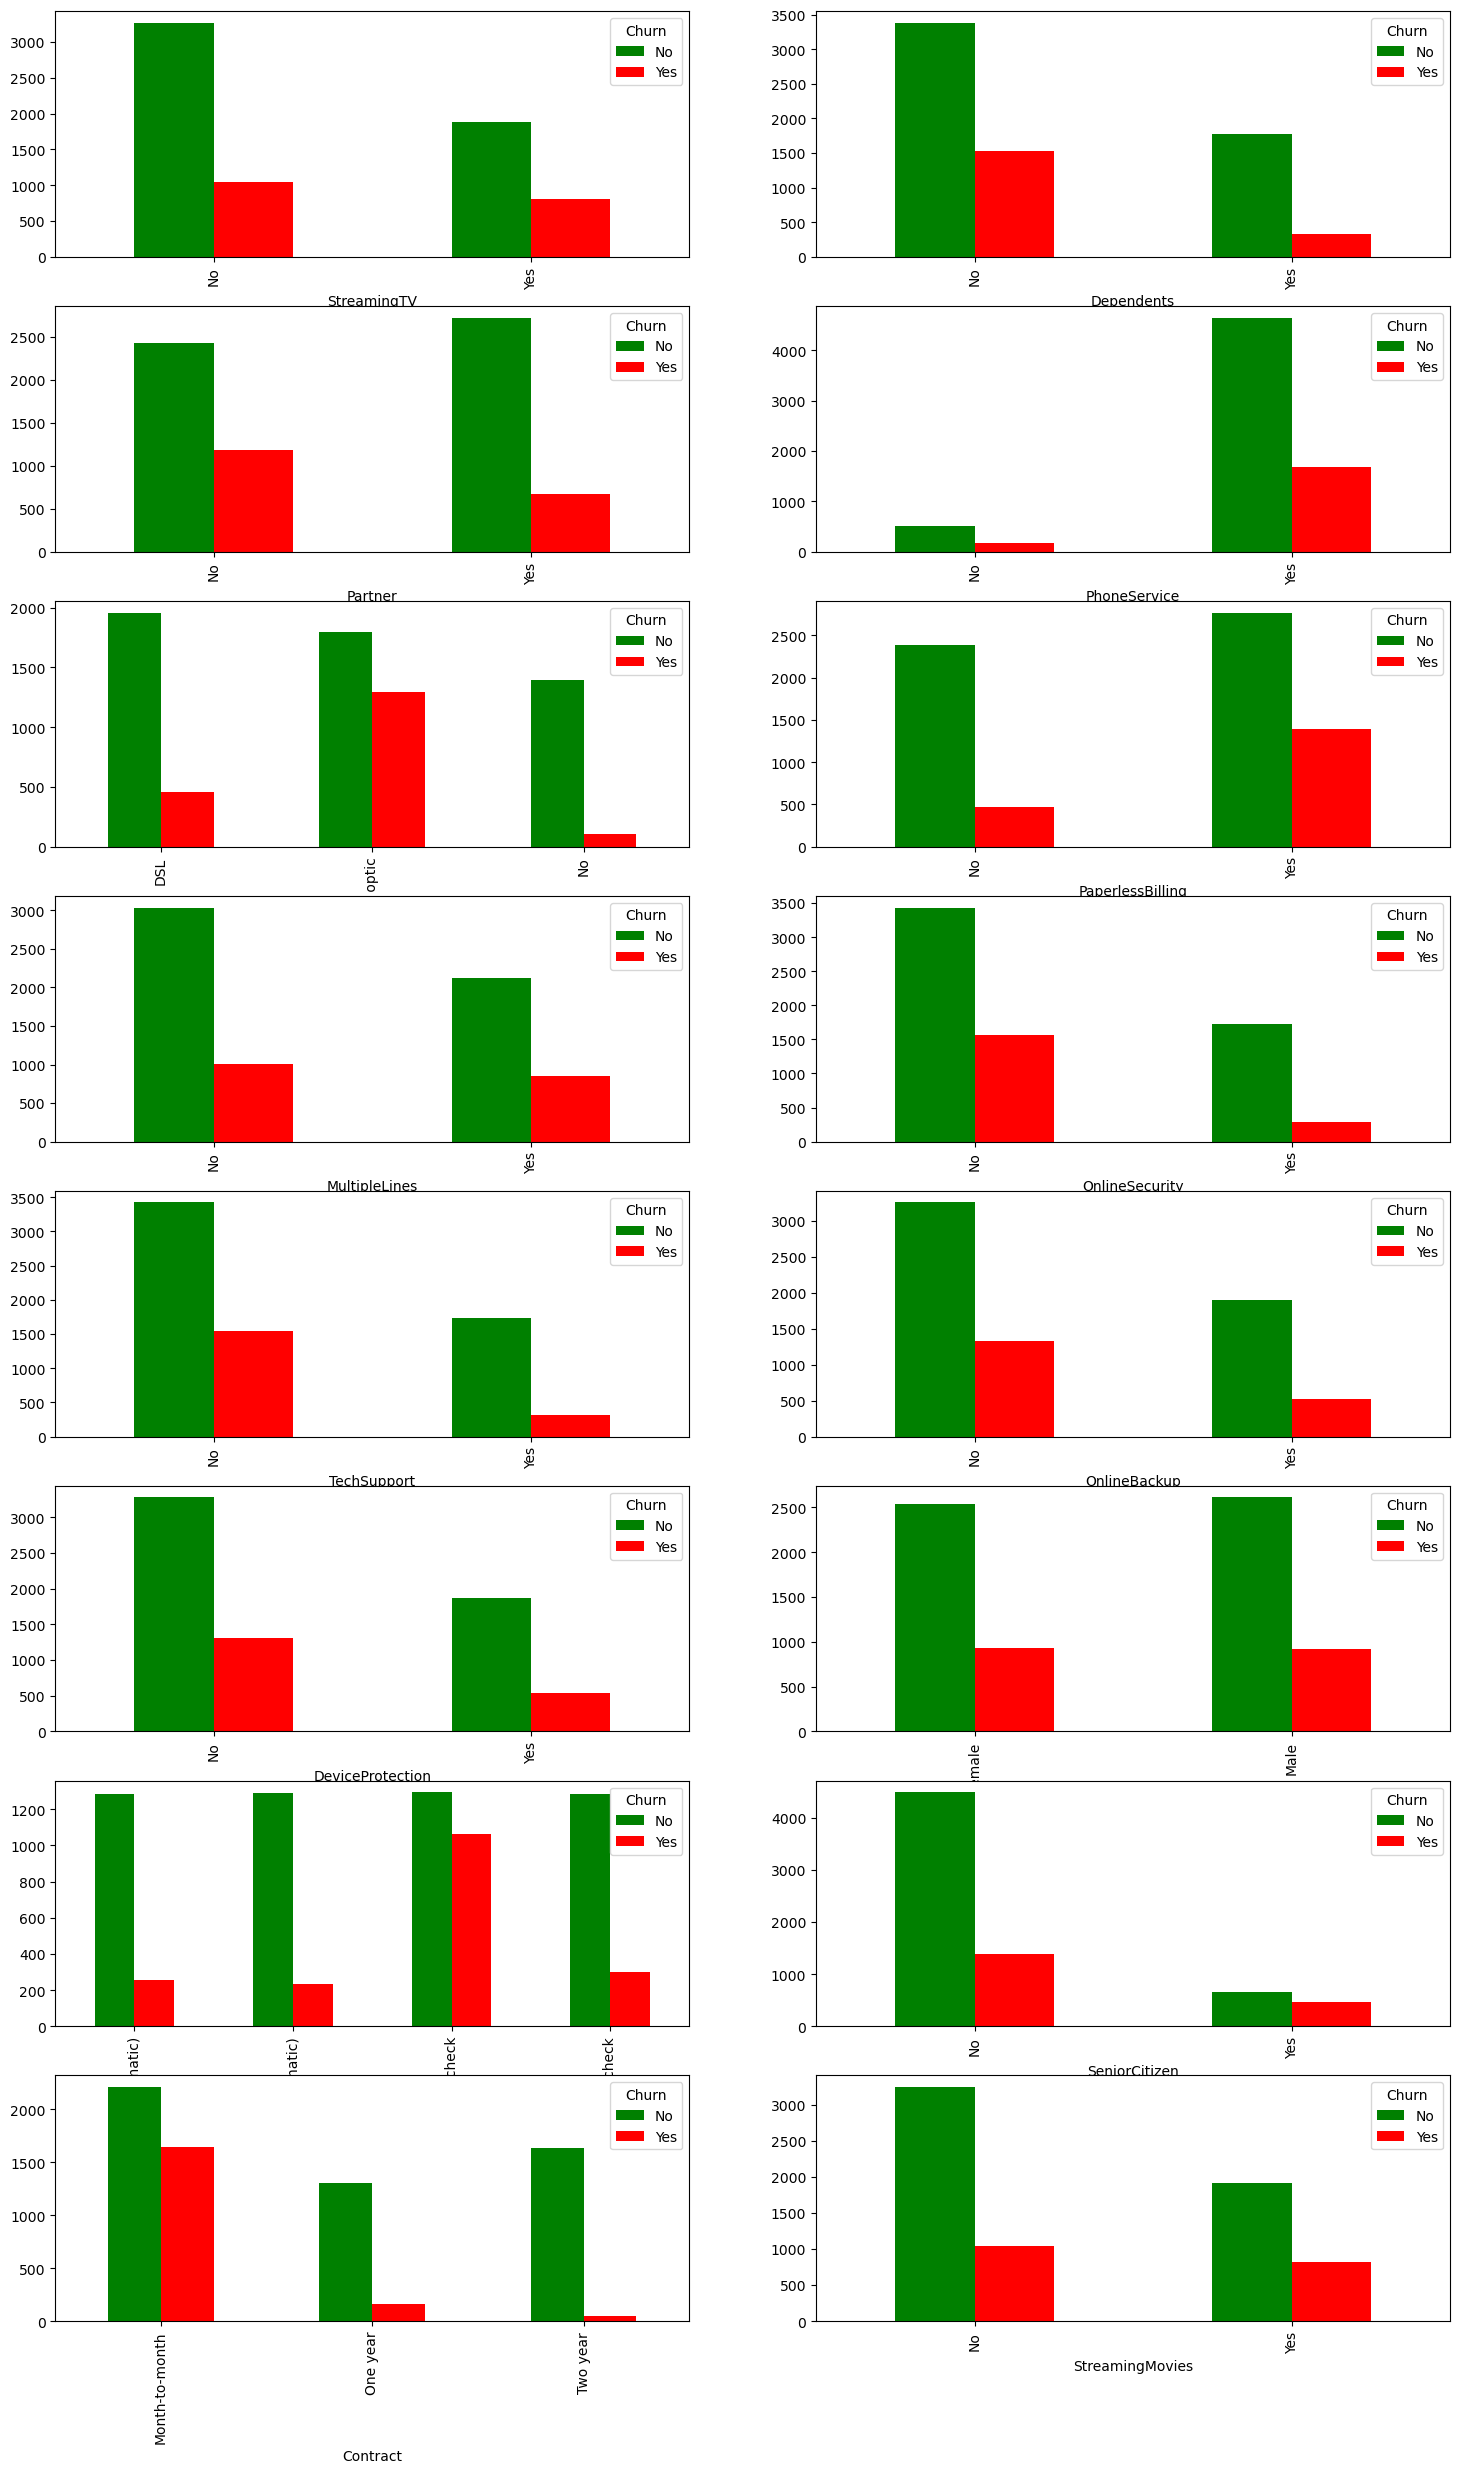

In [23]:
# Exploration: Categorical vs Categorical
fig, PlotCanvas = plt.subplots(nrows=int(len(categoricalFeatures)/2), ncols=2, figsize=(18,30))

lin = 0
col = 0
for CategoricalColumn,i in zip(categoricalFeatures, range(len(categoricalFeatures))):
    if col == 1:
        lin = lin+1
    col = i%2

    CrossTabResult = pd.crosstab(index=df[CategoricalColumn], columns=df['Churn'])
    CrossTabResult.plot.bar(color=['green','red'], ax=PlotCanvas[lin,col])

plt.show()


In [30]:


def FunctionChisq(inpData: pd.DataFrame, TargetVariable:str, CategoricalVariablesList:list[str]):
    from scipy.stats import chi2_contingency
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable],
        columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
    return(SelectedPredictors)


In [34]:
selCateg = FunctionChisq(df, 'Churn', categoricalFeatures)

StreamingTV is correlated with Churn | P-Value: 5.985662157966025e-08
Dependents is correlated with Churn | P-Value: 6.48802519091279e-42
Partner is correlated with Churn | P-Value: 2.0248561714739414e-35
PhoneService is NOT correlated with Churn | P-Value: 0.37815502389537725
InternetService is correlated with Churn | P-Value: 6.611624411865297e-159
PaperlessBilling is correlated with Churn | P-Value: 4.3362822204401427e-57
MultipleLines is correlated with Churn | P-Value: 0.0005019781425399228
OnlineSecurity is correlated with Churn | P-Value: 4.433936702110834e-46
TechSupport is correlated with Churn | P-Value: 1.0211659988009781e-42
OnlineBackup is correlated with Churn | P-Value: 1.3287905168142364e-11
DeviceProtection is correlated with Churn | P-Value: 6.23810221625441e-08
gender is NOT correlated with Churn | P-Value: 0.4833762023458479
PaymentMethod is correlated with Churn | P-Value: 1.1761169603808132e-138
SeniorCitizen is correlated with Churn | P-Value: 1.4703357738516479e

In [32]:
def FunctionAnova (inpData, TargetVar, PredictorList):
    from scipy.stats import f_oneway
    SelectedPredictors=[] # empty list of final selected predictors
    print('##### ANOVA Results ##### \n')
    for predictor in PredictorList:
        CategoryGroupLists=inpData.groupby(TargetVar)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        # If the ANOVA P-Value is < 0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVar, '| P-Value:',AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
           print(predictor, 'is NOT correlated with', TargetVar, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

In [33]:
selNumeric = FunctionAnova(df, TargetVar='Churn', PredictorList=numericFeatures)

##### ANOVA Results ##### 

tenure is correlated with Churn | P-Value: 3.093127427396592e-205
MonthlyCharges is correlated with Churn | P-Value: 2.0218234870891158e-60
TotalCharges is correlated with Churn | P-Value: 3.914665283676891e-63


In [38]:
SelectedColumns = selCateg + selNumeric + [goalAttribute]

dfML = df[SelectedColumns]
dfML.head()



,StreamingTV,Dependents,Partner,InternetService,PaperlessBilling,MultipleLines,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,PaymentMethod,SeniorCitizen,Contract,StreamingMovies,tenure,MonthlyCharges,TotalCharges,Churn
0,No,No,Yes,DSL,Yes,No,No,No,Yes,No,Electronic check,No,Month-to-month,No,1,29.85,29.85,No
1,No,No,No,DSL,No,No,Yes,No,No,Yes,Mailed check,No,One year,No,34,56.95,1889.50,No
2,No,No,No,DSL,Yes,No,Yes,No,Yes,No,Mailed check,No,Month-to-month,No,2,53.85,108.15,Yes
3,No,No,No,DSL,No,No,Yes,Yes,No,Yes,Bank transfer (automatic),No,One year,No,45,42.30,1840.75,No
4,No,No,No,Fiber optic,Yes,No,No,No,No,No,Electronic check,No,Month-to-month,No,2,70.70,151.65,Yes


In [39]:
# Converting the binary nominal variables to numeric

dfML = dfML.copy()
for feature in selCateg:
    if dfML[feature].nunique() == 2:
        dfML[feature] = (dfML[feature].values == 'Yes').astype(int)

dfML.head()

,StreamingTV,Dependents,Partner,InternetService,PaperlessBilling,MultipleLines,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,PaymentMethod,SeniorCitizen,Contract,StreamingMovies,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,DSL,1,0,0,0,1,0,Electronic check,0,Month-to-month,0,1,29.85,29.85,No
1,0,0,0,DSL,0,0,1,0,0,1,Mailed check,0,One year,0,34,56.95,1889.50,No
2,0,0,0,DSL,1,0,1,0,1,0,Mailed check,0,Month-to-month,0,2,53.85,108.15,Yes
3,0,0,0,DSL,0,0,1,1,0,1,Bank transfer (automatic),0,One year,0,45,42.30,1840.75,No
4,0,0,0,Fiber optic,1,0,0,0,0,0,Electronic check,0,Month-to-month,0,2,70.70,151.65,Yes


In [42]:
# Treating all the nominal variables at once using dummy variables
# It seems that it created n - 1 columns for each column, where n is the number of unique values
dfML = pd.get_dummies(dfML, drop_first=True)
dfML.head()

3


,StreamingTV,Dependents,Partner,PaperlessBilling,MultipleLines,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,SeniorCitizen,...,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,Churn_Yes
0,0,0,1,1,0,0,0,1,0,0,...,29.85,29.85,False,False,False,True,False,False,False,False
1,0,0,0,0,0,1,0,0,1,0,...,56.95,1889.50,False,False,False,False,True,True,False,False
2,0,0,0,1,0,1,0,1,0,0,...,53.85,108.15,False,False,False,False,True,False,False,True
3,0,0,0,0,0,1,1,0,1,0,...,42.30,1840.75,False,False,False,False,False,True,False,False
4,0,0,0,1,0,0,0,0,0,0,...,70.70,151.65,True,False,False,True,False,False,False,True


In [44]:
dfML.rename({'Churn_Yes': 'Churn'}, axis='columns', inplace=True)

In [45]:
# train and test set stratified
from sklearn.model_selection import train_test_split

X = dfML.iloc[:,:-1] # All features except last
y = dfML.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train size: ', X_train.shape)
print('Test size: ', X_test.shape)

# Verify conditions in train and test
print('Train condition distribution \n', y_train.value_counts(normalize=True))
print('Test condition distribution \n', y_test.value_counts(normalize=True))

Train size:  (5608, 21)
Test size:  (1402, 21)
Train condition distribution 
 Churn
False    0.735021
True     0.264979
Name: proportion, dtype: float64
Test condition distribution 
 Churn
False    0.735378
True     0.264622
Name: proportion, dtype: float64


Data Normalization

In [46]:
from sklearn.preprocessing import StandardScaler

#StandardScaler transforms data so each feature have zero-mean and unit standard-devation

stdScaler = StandardScaler()
Xstd_train = stdScaler.fit_transform(X_train)
Xstd_test = stdScaler.fit_transform(X_test)

K-nearest Neighbors (default values)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier default values: n_neighbors=5, metric='mink

clf = KNeighborsClassifier()

# Creating the model on training data
knn = clf.fit(Xstd_train, y_train)
y_pred = knn.predict(Xstd_test)

In [49]:
# Assesment of the model
# For this case, the FP (right top corner) are more severe (it means we dont find the clients that want to leave) 
# => we need to adjust the model so it lovers (0.51 recall is bad)
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred, labels=[1,0]))

print(classification_report(y_test, y_pred, labels=[1,0]))




[[188 183]
 [147 884]]
              precision    recall  f1-score   support

           1       0.56      0.51      0.53       371
           0       0.83      0.86      0.84      1031

    accuracy                           0.76      1402
   macro avg       0.69      0.68      0.69      1402
weighted avg       0.76      0.76      0.76      1402



In [50]:
from sklearn.model_selection import cross_val_score

# Choosing the best K value using K-fold cross validation

kvalues = []
cv_recall = []
cv_scores = []

# K from 1..151 odd numbers
for i in range(1, 151, 2):
    kvalues.append(i)

    knn = KNeighborsClassifier(n_neighbors=i)

    # CrossValidation
    cv_recall = cross_val_score(knn, Xstd_train, y_train, scoring='recall', cv=5)
    cv_scores.append(np.mean(cv_recall))

results = pd.DataFrame({'K': kvalues, 'recall': cv_scores})



In [52]:
results.sort_values(by='recall', ascending=False)

,K,recall
18,37,0.584119
21,43,0.583441
20,41,0.581430
52,105,0.580089
53,107,0.579418
...,...,...
4,9,0.553169
3,7,0.539048
2,5,0.532325
1,3,0.518198


Naive Bayes

In [53]:
from sklearn.naive_bayes  import GaussianNB

# GaussianNB is used in Binomial CLassification
clf = GaussianNB()

cv_results = cross_val_score(clf, X_train, y_train, scoring='recall')

print (f'Nabyes, recall: {cv_results.mean()}')

Nabyes, recall: 0.7779291799426028


## Test both models with a test set

In [54]:
knnmodel = KNeighborsClassifier(n_neighbors=37)
knnmodel.fit(Xstd_train, y_train)

y_pred = knnmodel.predict(Xstd_test)

print('\nConfusion matrix')

print(confusion_matrix(y_test, y_pred, labels=[1,0]))

print(classification_report(y_test, y_pred, labels=[1,0]))


Confusion matrix
[[202 169]
 [135 896]]
              precision    recall  f1-score   support

           1       0.60      0.54      0.57       371
           0       0.84      0.87      0.85      1031

    accuracy                           0.78      1402
   macro avg       0.72      0.71      0.71      1402
weighted avg       0.78      0.78      0.78      1402



In [55]:
bayes_model = GaussianNB()
bayes_model.fit(Xstd_train, y_train)

y_pred = bayes_model.predict(Xstd_test)

print('\nConfusion matrix')

print(confusion_matrix(y_test, y_pred, labels=[1,0]))

print(classification_report(y_test, y_pred, labels=[1,0]))


Confusion matrix
[[277  94]
 [258 773]]
              precision    recall  f1-score   support

           1       0.52      0.75      0.61       371
           0       0.89      0.75      0.81      1031

    accuracy                           0.75      1402
   macro avg       0.70      0.75      0.71      1402
weighted avg       0.79      0.75      0.76      1402

